In [23]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
import keras
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

base = '/content/COVID-19_Radiography_Dataset/'

In [24]:
folders = os.listdir(base)
print(folders)

['Viral_Pneumonia', 'COVID', 'Lung_Opacity', 'Normal']


In [25]:
%%time

Data, Lables = [], []

for item in folders:
    new_path = os.path.join(base, item)
    new_path += '/images'
    for img in os.listdir(new_path):
        img_path = os.path.join(new_path, img)
        Data.append(np.array(cv2.resize(cv2.imread(img_path).astype('float32') / 255.0, (100,100))))
        Lables.append(folders.index(item))

CPU times: user 57.7 s, sys: 50.1 s, total: 1min 47s
Wall time: 1min 39s


In [26]:
Data = np.array(Data)
Lables = np.array(Lables)
print('Data Shape', Data.shape)
print('Lable Shape', Lables.shape)

Data Shape (21165, 100, 100, 3)
Lable Shape (21165,)


In [27]:
x_train, x_test, y_train, y_test = train_test_split(Data, Lables, test_size = .2, random_state = 1)

In [28]:
print('x_train Shape', x_train.shape)
print('x_test Shape', x_test.shape)
print('y_train Shape', y_train.shape)
print('y_test Shape', y_test.shape)

x_train Shape (16932, 100, 100, 3)
x_test Shape (4233, 100, 100, 3)
y_train Shape (16932,)
y_test Shape (4233,)


In [29]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(4, activation = 'softmax')
])

In [31]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [32]:
%%time
history = model.fit(x_train, y_train, batch_size = 32, epochs = 5, validation_data = (x_test, y_test))

Epoch 1/5
530/530 [==============================] - 5s 8ms/step - loss: 1.6087 - accuracy: 0.6167 - val_loss: 0.8271 - val_accuracy: 0.6322
Epoch 2/5
530/530 [==============================] - 4s 8ms/step - loss: 0.7816 - accuracy: 0.6775 - val_loss: 1.2632 - val_accuracy: 0.4895
Epoch 3/5
530/530 [==============================] - 4s 7ms/step - loss: 0.7489 - accuracy: 0.6921 - val_loss: 0.8027 - val_accuracy: 0.6754
Epoch 4/5
530/530 [==============================] - 4s 7ms/step - loss: 0.7264 - accuracy: 0.7030 - val_loss: 0.6829 - val_accuracy: 0.7201
Epoch 5/5
530/530 [==============================] - 4s 8ms/step - loss: 0.7011 - accuracy: 0.7126 - val_loss: 0.6688 - val_accuracy: 0.7288
CPU times: user 25.6 s, sys: 1.58 s, total: 27.2 s
Wall time: 42.4 s


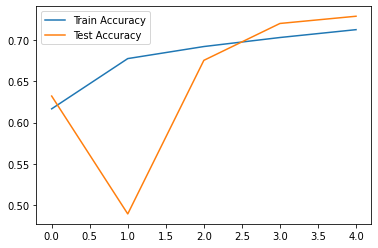

In [33]:
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.legend()
plt.show()

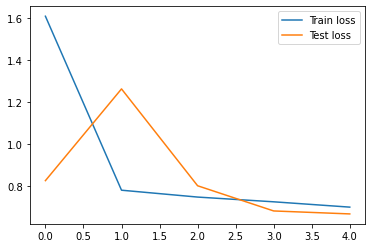

In [34]:
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Test loss')
plt.legend()
plt.show()

In [35]:
model.evaluate(x_test, y_test)

133/133 [==============================] - 1s 4ms/step - loss: 0.6688 - accuracy: 0.7288


[0.6688176989555359, 0.7287975549697876]